In [1]:
import sys
sys.path.append('../')

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers_mom6.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [9]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [10]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/GZ21_results', additional_subfolder='')

In [126]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [12]:
len(ds.exps)

649

In [13]:
for exp in ds.exps:
    if 'GZ' in exp:
        print(exp)

GZ21-R4
GZ21-R5
GZ21-R6
GZ21-R7
GZ21-R8
R2_GZ-20YEAR_no_scaling
R3_GZ-20YEAR_no_scaling
R4_GZ-20YEAR
R4_GZ-20YEAR_no_scaling
R5_GZ-20YEAR
R5_GZ-20YEAR_no_scaling
R6_GZ-20YEAR
R6_GZ-20YEAR_no_scaling
R7_GZ-20YEAR
R7_GZ-20YEAR_no_scaling
R8_GZ-20YEAR
R8_GZ-20YEAR_no_scaling


In [15]:
for exp in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', exp)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


# Compare my ZB20 to Nora's

In [14]:
smooth = xr.open_mfdataset('/scratch/nl2631/mom6/double_gyre/R4_reduced_outputs/R4_ZB20-Smooth/prog*nc', decode_times=False)

In [38]:
reynolds = xr.open_mfdataset('/scratch/nl2631/mom6/double_gyre/R4_reduced_outputs/R4_ZB20-Reynolds/prog*nc', decode_times=False)

In [40]:
ssh_smooth = smooth.e.isel(zi=0).sel(Time=slice(3650,None)).mean('Time').compute()
ssh_reynolds = reynolds.e.isel(zi=0).sel(Time=slice(3650,None)).mean('Time').compute()

In [41]:
def plot_ssh(ssh, x=True, y=True, target='R64_R4', rmse=True):

    print(float(ssh.min()), float(ssh.max()))
    levels = np.arange(-4,4.5,0.5)
    im = ssh.plot.contourf(levels=levels, cmap='bwr', linewidths=1, vmin=-4, vmax=4, add_colorbar=False)#, cbar_kwargs={'label': 'SSH, $m$', 'ticks': [-4,-3,-2,-1,0,1,2,3,4]})
    Cplot = ssh.plot.contour(levels=levels, colors='k', linewidths=1)
    plt.gca().clabel(Cplot, Cplot.levels)
    if x:
        plt.xticks((0, 5, 10, 15, 20))
        plt.xlabel('Longitude')
    else:
        plt.xticks([])
        plt.xlabel('')
        
    if y:
        plt.yticks((30, 35, 40, 45, 50))
        plt.ylabel('Latitude')
    else:
        plt.yticks([])
        plt.ylabel('')
    plt.title('')
    if rmse:
        RMSE = Lk_error(ssh,ds[target].ssh_mean)[0]
        plt.text(8.5,31,'RMSE='+"{:.3f}".format(RMSE)+'$\,\mathrm{m}$', fontsize=13)
    
    plt.gca().set_aspect(1)
    
    return im

-1.9743225574493408 1.3992725610733032


Text(0.5, 1.0, 'ZB-Smooth')

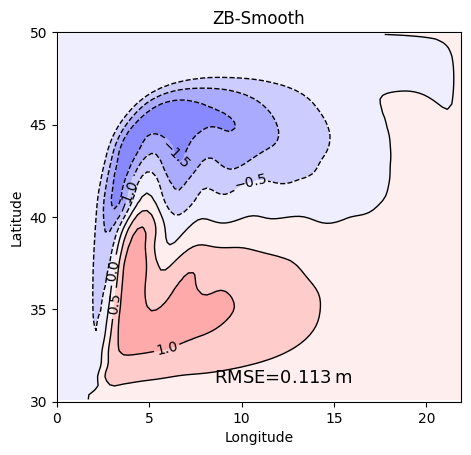

In [44]:
plot_ssh(ssh_smooth)
plt.title('ZB-Smooth')

-2.211544990539551 1.833686113357544


Text(0.5, 1.0, 'ZB-Reynolds')

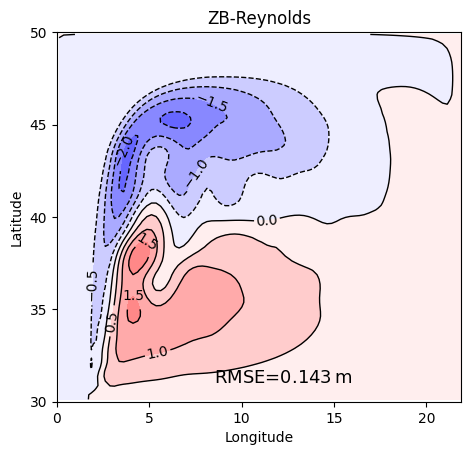

In [45]:
plot_ssh(ssh_reynolds)
plt.title('ZB-Reynolds')

# Layer-averaged vs Layer-integrated

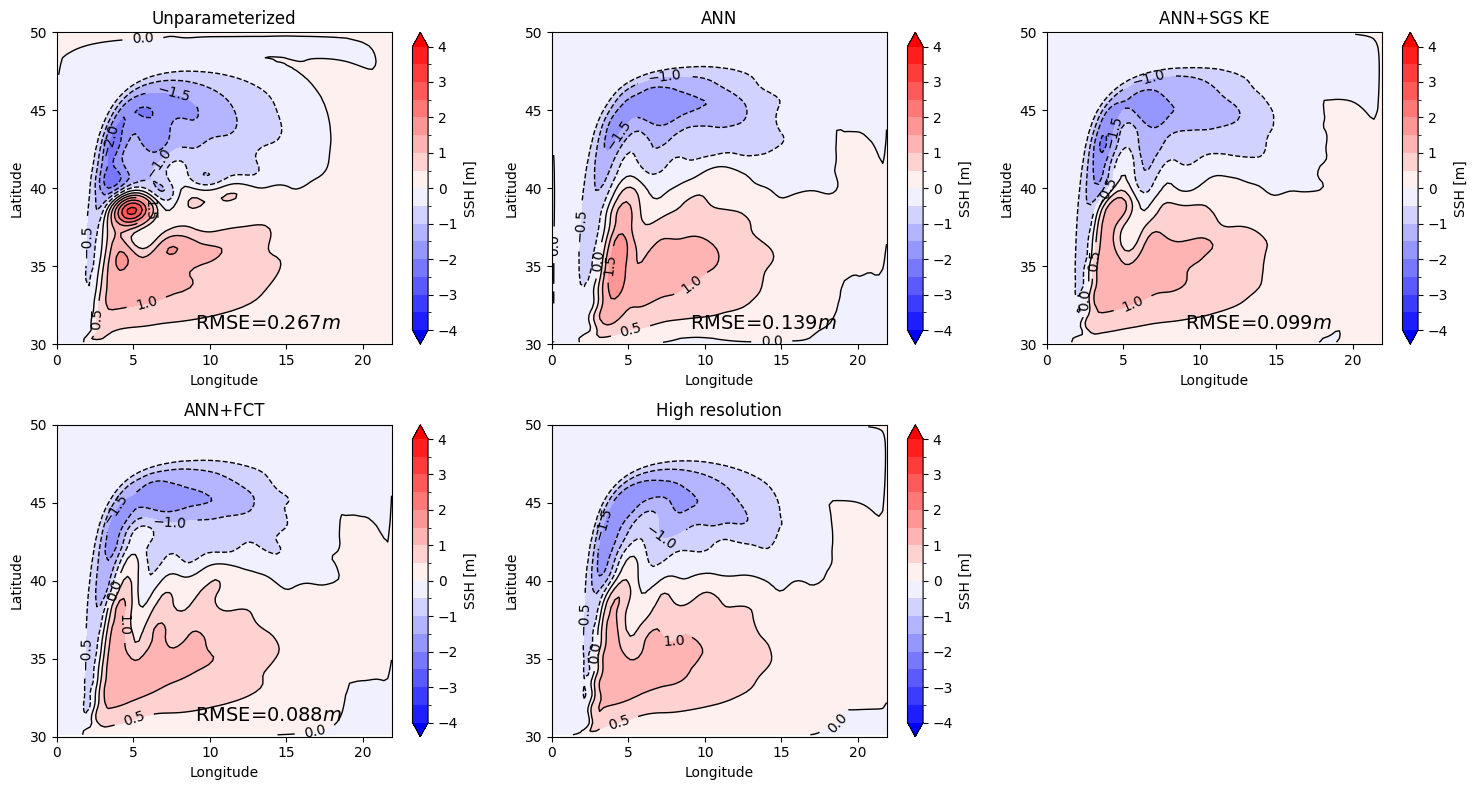

In [132]:
ds.plot_ssh(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE-div-upwind-time-collocated', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT', 'R64_R4'], ['Unparameterized', 'ANN', 'ANN+SGS KE', 'ANN+FCT', 'High resolution'])

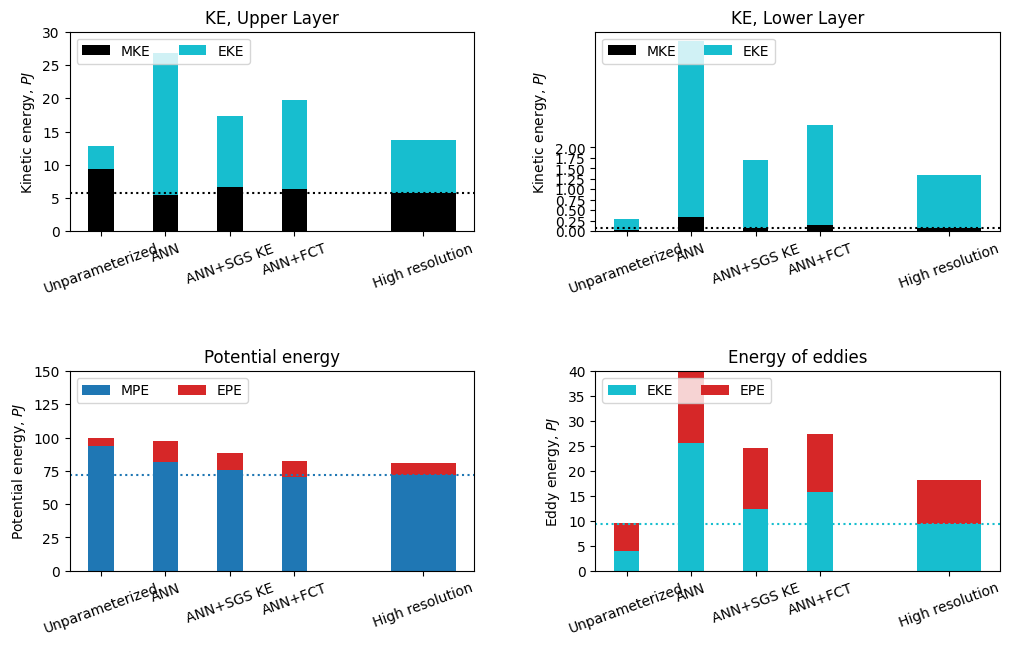

In [133]:
ds.plot_KE_PE(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE-div-upwind-time-collocated', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT', 'R64_R4'], ['Unparameterized', 'ANN', 'ANN+SGS KE', 'ANN+FCT', 'High resolution'])

In [139]:
def plot(idx=0):
    ds.plot_RV(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE-div-upwind-time-collocated', 
                 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT', 'R64_R4'], ['Unparameterized', 'ANN', 'ANN+SGS KE', 'ANN+FCT', 'High resolution\n coarsegrained'], idx=idx)

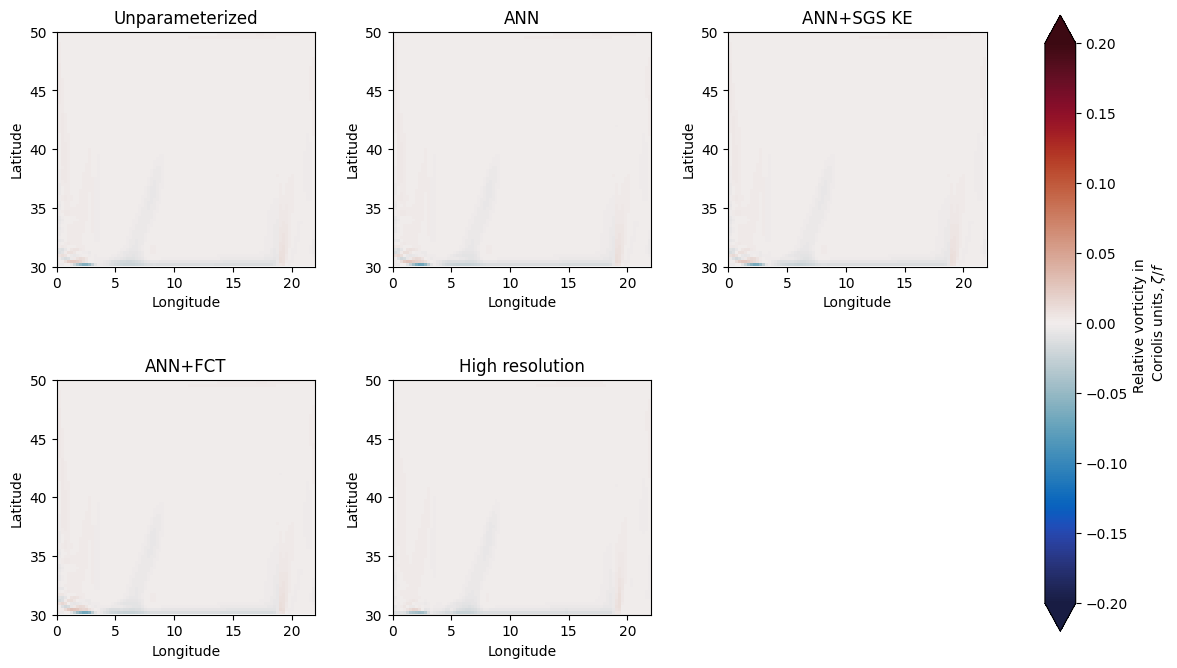

In [140]:
plot()

In [142]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(plot, range(0,243), FPS=15, filename='DG_FCT.mp4', dpi=150)

Frames already exists in folder .ffmpeg/DG_FCT
Do you want to update snapshots?: [y/n]y
Native resolution of snapshots is used: 1762x998

Animation DG_FCT.mp4 at FPS=15 will last for 16.2 seconds. The frames are saved to 
.ffmpeg/DG_FCT



ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CPU times: user 4min 18s, sys: 2min 25s, total: 6min 44s
Wall time: 4min 55s


frame=  243 fps= 58 q=-1.0 Lsize=   14428kB time=00:00:16.00 bitrate=7386.9kbits/s speed=3.82x    
video:14424kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.026717%
[libx264 @ 0x5578d422f140] frame I:1     Avg QP:16.14  size: 43617
[libx264 @ 0x5578d422f140] frame P:61    Avg QP:18.56  size: 66876
[libx264 @ 0x5578d422f140] frame B:181   Avg QP:22.00  size: 58818
[libx264 @ 0x5578d422f140] consecutive B-frames:  0.4%  0.8%  0.0% 98.8%
[libx264 @ 0x5578d422f140] mb I  I16..4: 19.8% 68.0% 12.2%
[libx264 @ 0x5578d422f140] mb P  I16..4:  1.8%  6.6% 15.0%  P16..4:  5.3%  3.8%  2.5%  0.0%  0.0%    skip:65.0%
[libx264 @ 0x5578d422f140] mb B  I16..4:  1.2%  3.0% 11.5%  B16..8:  6.8%  5.7%  2.9%  direct: 2.1%  skip:66.9%  L0:47.0% L1:35.8% BI:17.2%
[libx264 @ 0x5578d422f140] 8x8 transform intra:23.0% inter:55.3%
[libx264 @ 0x5578d422f140] coded y,uvDC,uvAC intra: 88.6% 89.2% 81.8% inter: 12.5% 9.1% 4.3%
[libx264 @ 0x5578d422f140] i16 v,h,dc,p: 40% 37% 19%  4%


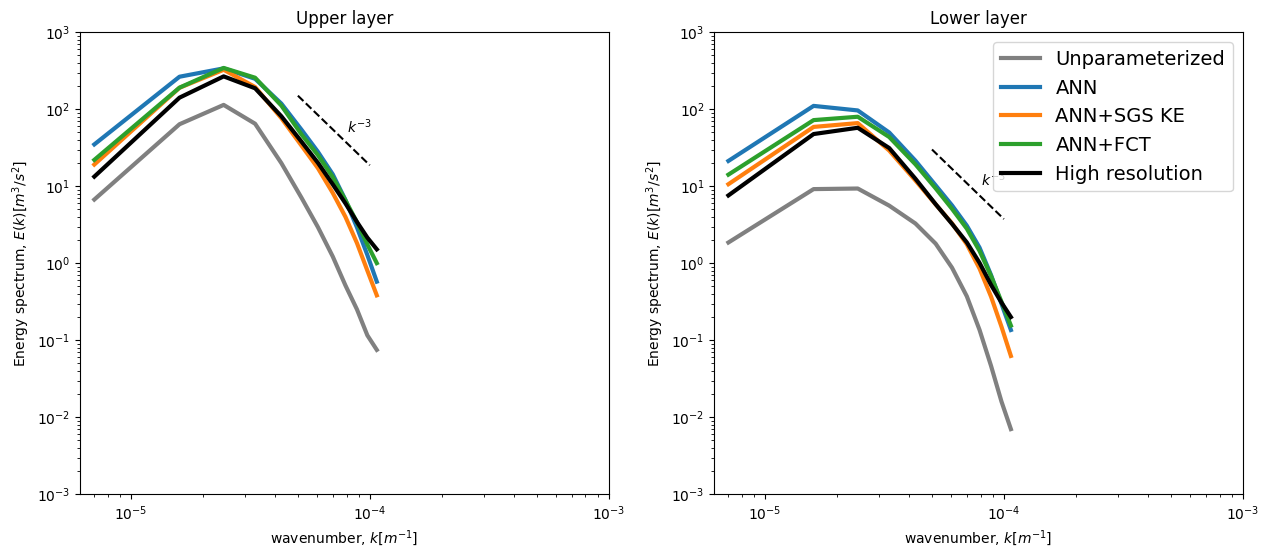

In [144]:
ds.plot_KE_spectrum(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE-div-upwind-time-collocated', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT', 'R64_R4'], labels=['Unparameterized', 'ANN', 'ANN+SGS KE', 'ANN+FCT', 'High resolution'])

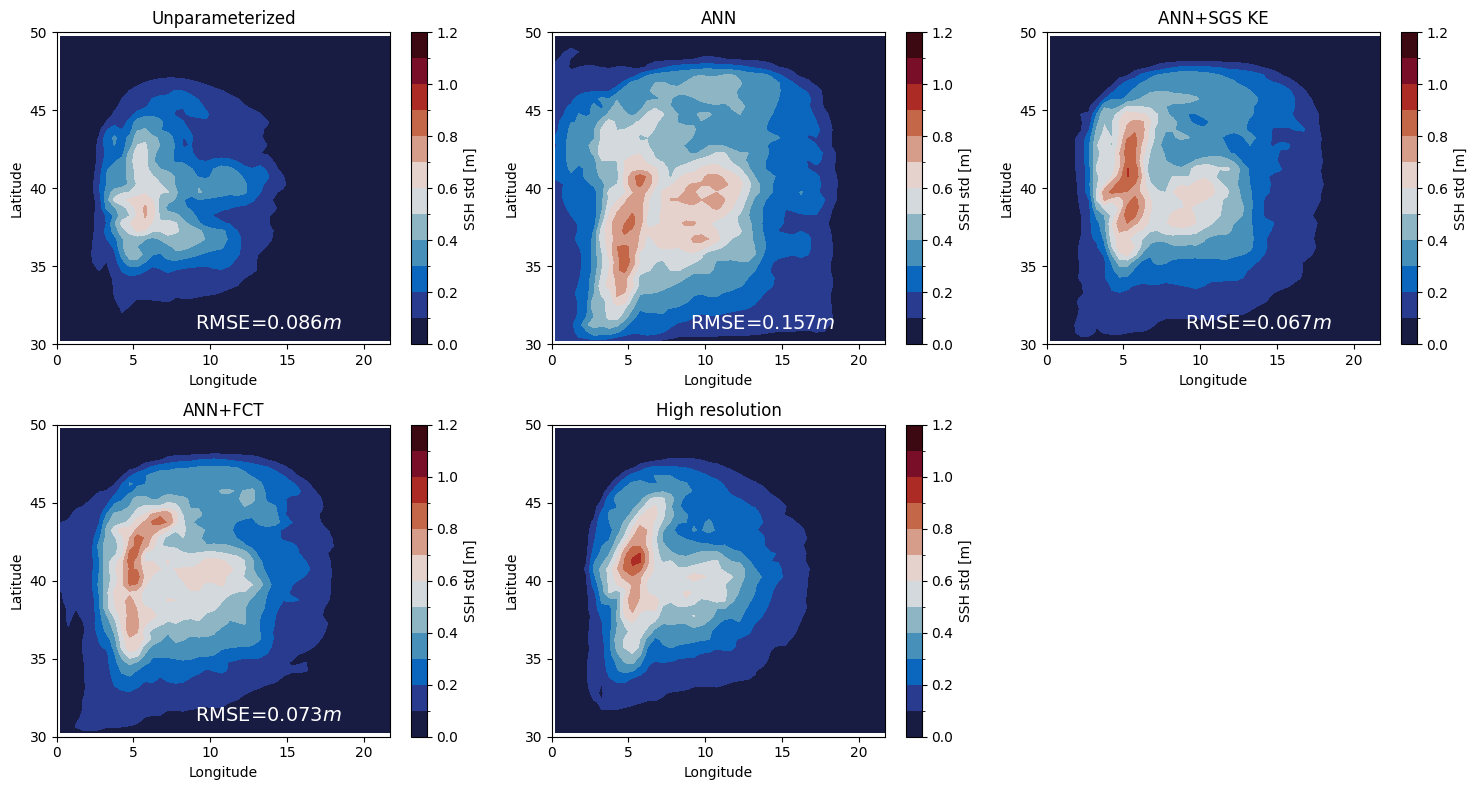

In [145]:
ds.plot_ssh_std(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE-div-upwind-time-collocated', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT', 'R64_R4'], labels=['Unparameterized', 'ANN', 'ANN+SGS KE', 'ANN+FCT', 'High resolution'])

# Generalization

In [18]:
def sample_ssh(exp, target):
    
    sample = []
    for year_start in [5, 10, 15]:
        year_end = year_start + 5
        idx = slice(365*year_start, 365*year_end)
        sample.append(
            Lk_error(ds[exp].ea.isel(zi=0).sel(Time=idx).mean('Time'), ds[target].ssh_mean)[0]
        )
    return xr.DataArray(sample, dims='sample')

In [19]:
def error_ssh(exp, target):
    return Lk_error(ds[exp].ssh_mean,ds[target].ssh_mean)[0]

In [20]:
def sample_KE(exp, target=None):
    sample = []
    for year_start in [5, 10, 15]:
        year_end = year_start + 5
        idx = slice(365*year_start, 365*year_end)
        u = ds[exp].u.sel(Time=idx)
        v = ds[exp].v.sel(Time=idx)
        h = ds[exp].h.sel(Time=idx)

        KE = 1e-15 * ds[exp].KE_joul(u, v, h).mean('Time').sum()
        sample.append(KE)
    return xr.DataArray(sample, dims='sample')

In [21]:
def KE(exp, target=None):
    return 1e-15 * (ds[exp].MKE_joul + ds[exp].EKE_joul).sum('zl').values

In [22]:
def sample_APE(exp, target=None):
    sample = []
    for year_start in [5, 10, 15]:
        year_end = year_start + 5
        idx = slice(365*year_start, 365*year_end)
        e = ds[exp].e.sel(Time=idx)
        APE = 1e-15 * (
            ds[exp].PE_joul(e).mean('Time').sum() + 
            ds[exp].PE_ssh(e).mean('Time').sum()
        )
        sample.append(APE)
    return xr.DataArray(sample, dims='sample')

In [23]:
def APE(exp, target=None):
    return 1e-15 * (ds[exp].MPE_joul + ds[exp].EPE_joul + ds[exp].MPE_ssh + ds[exp].EPE_ssh).values

In [24]:
def generalization_error(prefix='ZB-clean', fun=error_ssh, confs=['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'], ZB=None):
    if ZB is None:
        ZB = sorted([float(exp.split('-')[-1]) for exp in ds.exps if f'{prefix}-R4' in exp])
        
    conf_list = []
    for i, conf in enumerate(confs):
        zb_list = []
        for j, zb in enumerate(ZB):
            try:
                error = fun(f'{prefix}-{conf}-ZB-{zb}', f'R64_{conf}')
            except:
                error = np.nan
            zb_list.append(error)
        if isinstance(zb_list[-1],xr.DataArray):
            zb_list = xr.concat(zb_list, dim='ZB')
        else:
            import pdb
            pdb.set_trace()
            zb_list = xr.DataArray(zb_list, dims='ZB')

        conf_list.append(zb_list)
    
    conf_list = xr.concat(conf_list, 'res')    
    conf_list['ZB'] = ZB
    return conf_list

# New plotter of APE/KE metrics

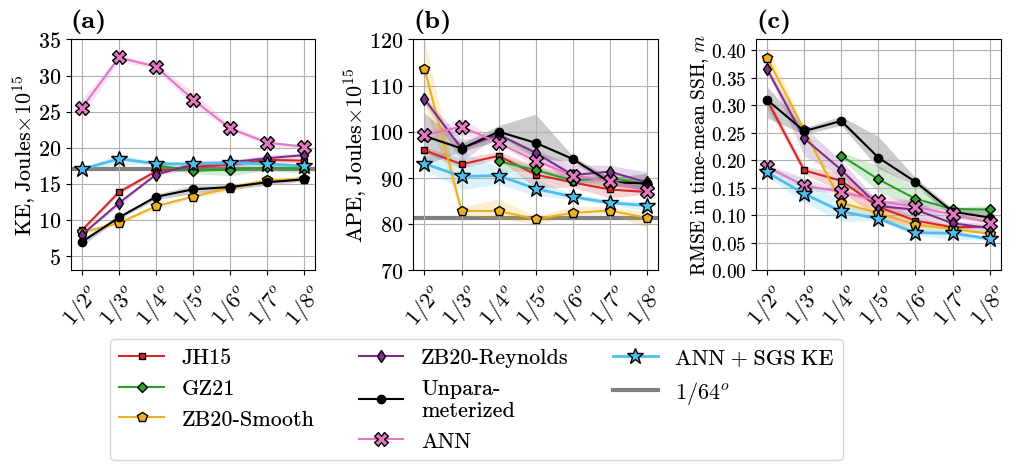

In [69]:
default_rcParams({'font.size': 16, 'figure.subplot.wspace': 0.4, 'figure.subplot.hspace': 0.1})
plt.figure(figsize=(12,3))

yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]

for row, fun in enumerate([sample_KE, sample_APE, sample_ssh]):
    plt.subplot(1,3,row+1)
    error = {}
    error['bare'] = xr.concat([fun(conf,f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    #error['ZB-clean'] = xr.concat([fun(f'ZB-clean-{conf}-ZB-0.4', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['ZB-Smooth'] = xr.concat([fun(f'ZB-Smooth-{conf}-ZB-1.0', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['ZB-Reynolds'] = xr.concat([fun(f'ZB-Reynolds-{conf}-ZB-2.0', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['Jansen-Held'] = xr.concat([fun(f'Jansen-Held-{conf}-ref', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['GZ'] = xr.concat([error['bare'].isel(res=0)*np.nan, error['bare'].isel(res=0)*np.nan] + [fun(f'{conf}_GZ-20YEAR', f'R64_{conf}') for conf in ['R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['ANN'] = xr.concat([fun(f'ANN_CM26_grid_harmonic_ver3-{conf}-ZB-1.0-Cs-0.0', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error['ANN-SGS-KE'] = xr.concat([fun(f'ANN_CM26_grid_harmonic_ver3-{conf}-ZB-1.0-SGS-KE', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
        
    def plot_markers_with_filling(model='Jansen-Held', color='tab:red', marker='s', label=None, markersize=None, lw=None):
        error[model].mean('sample').plot(color=color, marker=marker, label=label, markersize=markersize, markeredgecolor='k', lw=lw)
        plt.fill_between(range(7), error[model].min('sample'), error[model].max('sample'), color=color, alpha=0.2, lw=0)
    
    plot_markers_with_filling('Jansen-Held', 'tab:red', 's', 'JH15', 5)
    plot_markers_with_filling('GZ', 'tab:green', 'D', 'GZ21', 5)
    #plot_markers_with_filling('ZB-clean', 'tab:blue', 'o', 'ZB')
    plot_markers_with_filling('ZB-Smooth', yellow, 'p', 'ZB20-Smooth', 7)
    plot_markers_with_filling('ZB-Reynolds', violet, 'd', 'ZB20-Reynolds', 6)
    plot_markers_with_filling('bare', 'k', 'o', 'Unpara-\nmeterized', 6)
    plot_markers_with_filling('ANN', 'tab:pink', 'X', 'ANN', 10)
    plot_markers_with_filling('ANN-SGS-KE', lightblue, '*', 'ANN + SGS KE', 12, lw=2)
    
    plt.xticks([0,1,2,3,4,5,6], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$'],rotation=50)    
    plt.grid()
    plt.xlabel('')
    if fun == sample_KE:
        yticks = np.arange(5,40,5)
        plt.ylabel('KE, Joules$\\times10^{15}$')
        plt.yticks(yticks)
        plt.ylim([3,35])
        plt.axhline(y=KE('R64'),color='gray', zorder=-1,lw=3)
        #plt.text(0.0, 17.5,'$1/64^o$', color='gray')
    if fun == sample_APE:
        yticks = np.arange(70,130,10)
        plt.ylabel('APE, Joules$\\times10^{15}$')
        plt.yticks(yticks)
        plt.ylim([min(yticks), max(yticks)])
        plt.axhline(y=APE('R64'),color='gray',zorder=-1,lw=3)
    
    if fun == sample_ssh:
        yticks = np.arange(0,0.45,0.05)
        plt.ylabel('RMSE in time-mean SSH, $m$', fontsize=14)
        plt.yticks(yticks, fontsize=14)
        plt.ylim([0,0.42])

plt.gcf().align_ylabels()
set_letters(fontsize=18,x=0.0,y=1.05)
plt.plot(np.nan,np.nan,'-',color='gray',lw=3,label='$1/64^o$')
plt.legend(ncol=3, bbox_to_anchor=(0.4,-0.25))

plt.savefig('../figures/Metrics-ANN-SGS-KE-full.pdf')

# Mean zonal acceleration

In [36]:
FGR=2.5
ds.remesh('R64', 'R4', f'R64_R4_FGR{FGR}', operator= lambda x,y: gaussian_remesh(x,y,FGR=FGR))
for file in [f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part1.nc', f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part2.nc']:
    dataset = xr.open_dataset(file, decode_times=False)
    for key in dataset.keys():
        setattr(ds[f'R64_R4_FGR{FGR}'], key, dataset[key])

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR2.5


In [53]:
def plot_accel(exp, x=True, y=True, vmax=1.5, zonal=True, zl=0, resolved='False'):
    accel = lambda x: 1e+7*x.sel(Time=slice(365*10,None)).mean('Time').isel(zl=zl).compute()
    
    if '_R' in exp:
        if zonal:
            field = ds[exp].SGSx
            field.loc[{'xq': slice(0,5), 'yh': slice(48,50)}] = 0.
        else:
            field = ds[exp].SGSy
            field.loc[{'xh': slice(0,5), 'yq': slice(48,50)}] = 0.
    elif 'GZ' in exp:
        if zonal:
            field = ds[exp].mom.CNNu+ds[exp].mom.diffu
        else:
            field = ds[exp].mom.CNNv+ds[exp].mom.diffv
    elif 'ANN' in exp:
        if zonal:
            field = ds[exp].mom.ZB2020u
        else:
            field = ds[exp].mom.ZB2020v
    else:
        if zonal:
            field = ds[exp].mom.diffu
        else:
            field = ds[exp].mom.diffv
            
    if resolved == 'True':
        field = ds[exp].advection[0]
    elif resolved == 'joint':
        field = field + ds[exp].advection[0]
            
    acceleration = accel(field)
    
    print(float(acceleration.min()),float(acceleration.max()))
    im = acceleration.plot.imshow(vmin=-vmax, vmax=vmax, add_colorbar=False, cmap='seismic', interpolation='none')

    if x:
        plt.xticks((0, 5, 10, 15, 20))
        plt.xlabel('Longitude')
    else:
        plt.xticks([])
        plt.xlabel('')
        
    if y:
        plt.yticks((30, 35, 40, 45, 50))
        plt.ylabel('Latitude')
    else:
        plt.yticks([])
        plt.ylabel('')
    plt.title('')    
    plt.gca().set_aspect(1)
    
    return im

In [54]:
coarse = 'R4'
hires = 'R64'
hires_bar = 'R64_R4'
ZB = 'ZB-clean-R4-ZB-0.5'
JansenHeld = 'Jansen-Held-R4-ref';
ZB_smooth = 'ZB-Smooth-R4-ZB-1.0'
ZB_reynolds = 'ZB-Reynolds-R4-ZB-2.0'
GZ = 'R4_GZ-20YEAR'

labeling = {
'coarse': '$1/4^o$',
'hires': '$1/64^o$',
'hires_bar': '$1/64^o$-Coarse',
'ZB': '$1/4^o$, ZB20',
'JansenHeld': '$1/4^o$, JH15',
'ZB_smooth': '$1/4^o$, ZB20-Smooth',
'ZB_reynolds': '$1/4^o$, ZB20-Reynolds',
'GZ': '$1/4^o$, GZ21'
}

-10.65854263305664 6.637511253356934
-8.378390357616551 4.449274736397129
-4.87225341796875 6.93408203125
-4.993709087371826 7.517899513244629
-8.812776565551758 8.217284202575684
-8.3770170211792 5.107608795166016
-7.559136867523193 2.3394572734832764
-10.127265930175781 3.883437156677246
Colorbar-like object skipped


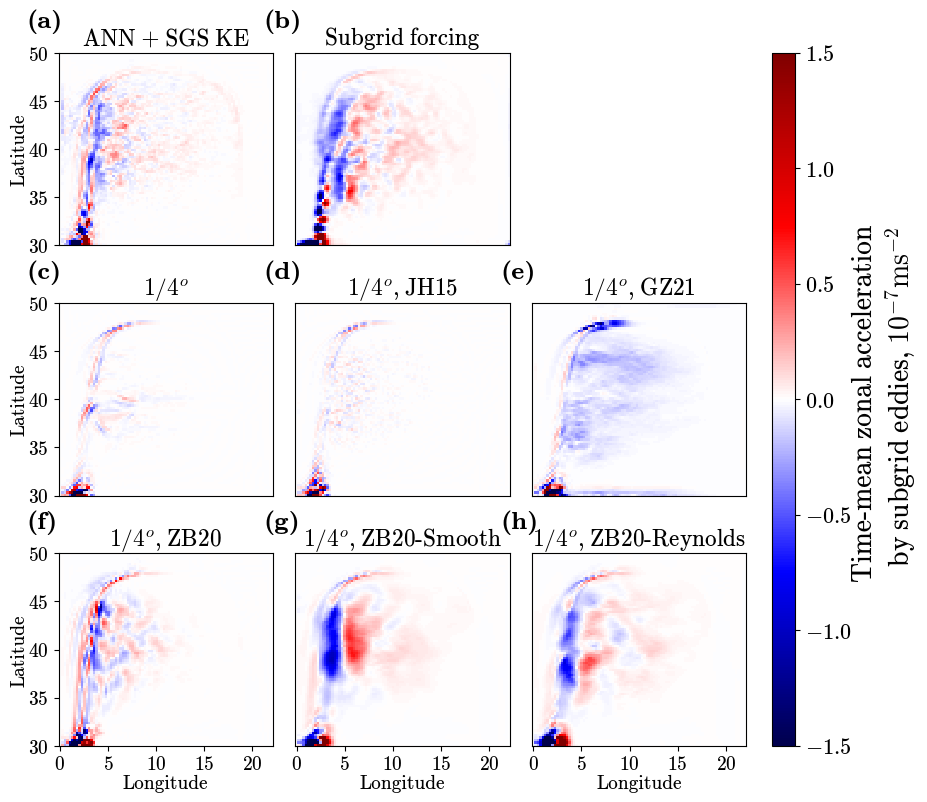

In [56]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))

plt.subplot(3,3,1)
im=plot_accel('ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-SGS-KE',x=False)
#plt.title('Filtered and \ncoarsegrained $1/64^o$')
plt.title('ANN + SGS KE')


plt.subplot(3,3,2)
im=plot_accel('R64_R4_FGR2.5',x=False, y=False)
#plt.title('Filtered and \ncoarsegrained $1/64^o$')
plt.title('Subgrid forcing')


plt.subplot(3,3,4)
plot_accel(coarse, x=False)
plt.title(labeling['coarse'])
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
#plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_accel(JansenHeld,x=False,y=False)
plt.title(labeling['JansenHeld'])

plt.subplot(3,3,6)
plot_accel(GZ,x=False,y=False)
plt.title(labeling['GZ'])

plt.subplot(3,3,7)
plot_accel(ZB)
plt.title(labeling['ZB'])

plt.subplot(3,3,8)
plot_accel(ZB_smooth,y=False)
plt.title(labeling['ZB_smooth'])
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_accel(ZB_reynolds,y=False)
plt.title(labeling['ZB_reynolds'])
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean zonal acceleration \n by subgrid eddies, $10^{-7} \\mathrm{m}\\mathrm{s}^{-2}$', fontsize=20)#, labelpad=5)

set_letters(fontsize=18, y=1.13,x=-0.15)

#plt.savefig('Paper-Figures/zonal-acceleration-20.pdf')

Text(0.5, 1.03, 'Experiments at resolution $1/6^o$')

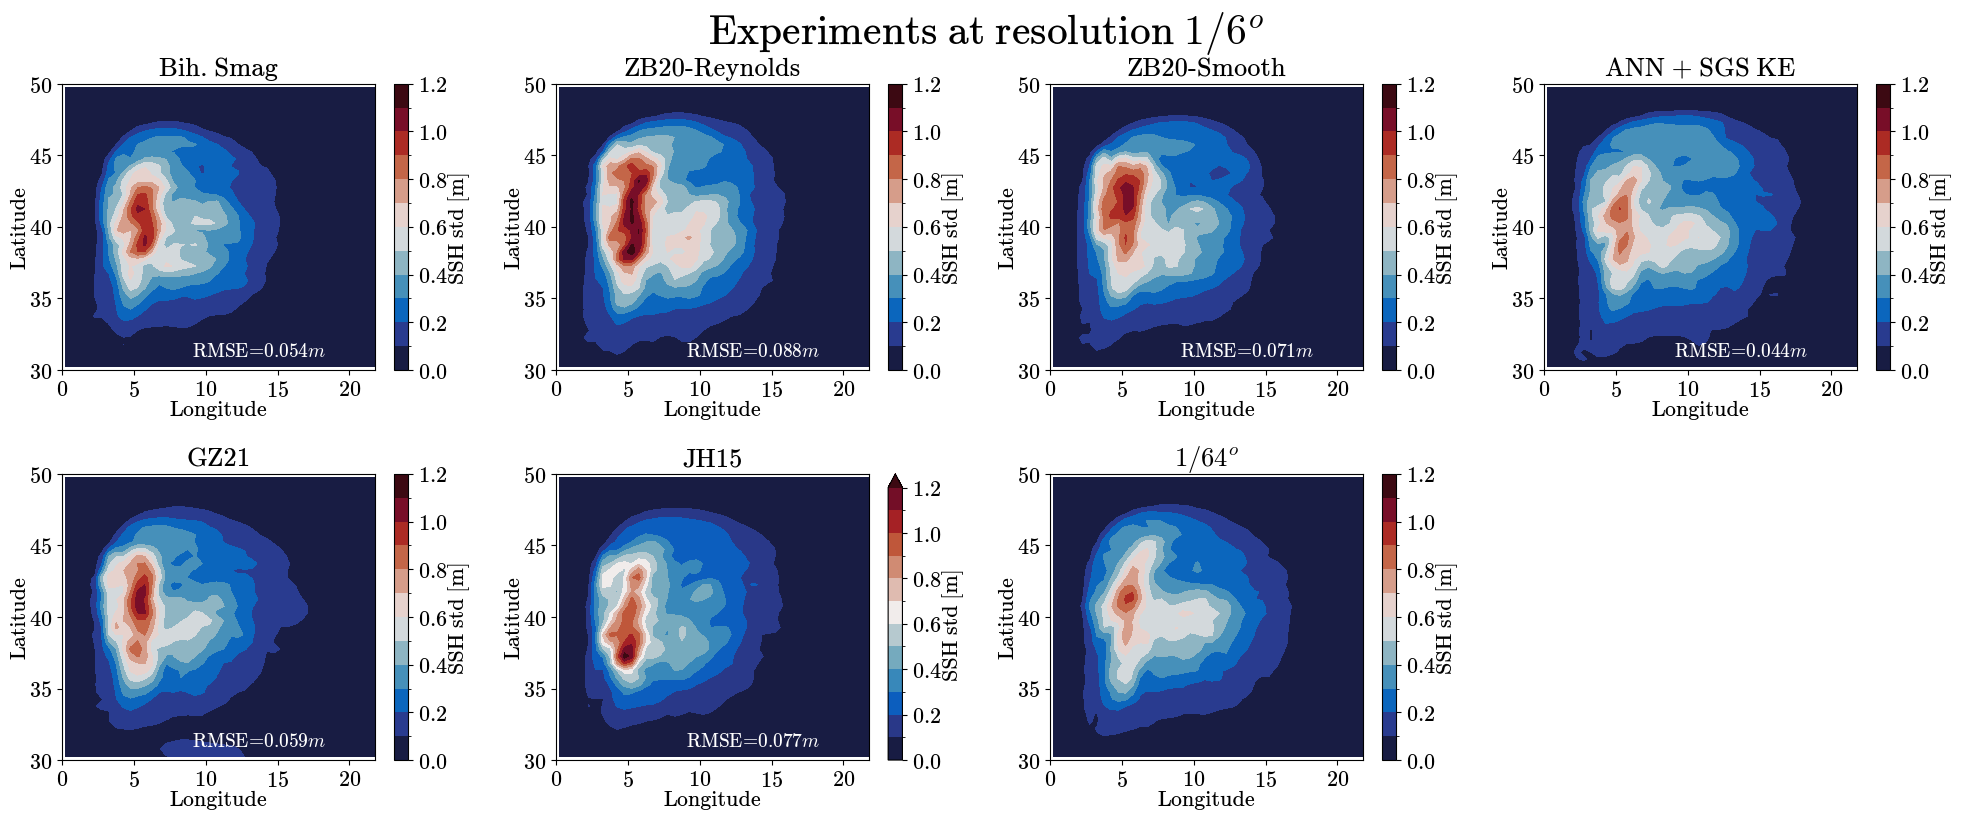

In [107]:
RR = 'R6'
ds.plot_ssh_std([f'{RR}', 
                 f'ZB-Reynolds-{RR}-ZB-2.0', 
                 f'ZB-Smooth-{RR}-ZB-1.0',
                 f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
                 f'{RR}_GZ-20YEAR',
                 'Jansen-Held-R4-ref',
                 f'R64_{RR}'], 
                ['Bih. Smag', 
                 'ZB20-Reynolds', 
                 'ZB20-Smooth', 
                 'ANN + SGS KE', 
                 'GZ21',
                 'JH15',
                 '$1/64^o$'], ncols=4)
plt.suptitle('Experiments at resolution $1/6^o$', y=1.03, fontsize=30)

# Plotting NW2

In [2]:
import xarray as xr

In [3]:
import math
def x_coord(array):
    '''
    Returns horizontal coordinate, 'xq' or 'xh'
    as xarray
    '''
    try:
        coord = array.xq
    except:
        coord = array.xh
    return coord

def y_coord(array):
    '''
    Returns horizontal coordinate, 'yq' or 'yh'
    as xarray
    '''
    try:
        coord = array.yq
    except:
        coord = array.yh
    return coord

def remesh(input, target, fillna=True):
    '''
    Input and target should be xarrays of any type (u-array, v-array, q-array, h-array).
    Datasets are prohibited.
    Horizontal mesh of input changes according to horizontal mesh of target.
    Other dimensions are unchanged!

    If type of arrays is different:
        - Interpolation to correct points occurs
    If input is Hi-res:
        - Coarsening with integer grain and subsequent interpolation to correct mesh if needed
    if input is Lo-res:
        - Interpolation to Hi-res mesh occurs

    Input and output Nan values are treates as zeros (see "fillna")
    '''

    # Define coordinates
    x_input  = x_coord(input)
    y_input  = y_coord(input)
    x_target = x_coord(target)
    y_target = y_coord(target)

    # ratio of mesh steps
    ratiox = np.diff(x_target)[0] / np.diff(x_input)[0]
    ratiox = math.ceil(ratiox)

    ratioy = np.diff(y_target)[0] / np.diff(y_input)[0]
    ratioy = math.ceil(ratioy)
    
    # B.C.
    if fillna:
        result = input.fillna(0)
    else:
        result = input
    
    if (ratiox > 1 or ratioy > 1):
        # Coarsening; x_input.name returns 'xq' or 'xh'
        result = result.coarsen({x_input.name: ratiox, y_input.name: ratioy}, boundary='pad').mean()

    # Coordinate points could change after coarsegraining
    x_result = x_coord(result)
    y_result = y_coord(result)

    # Interpolate if needed
    if not x_result.equals(x_target) or not y_result.equals(y_target):
        result = result.interp({x_result.name: x_target, y_result.name: y_target})
        if fillna:
            result = result.fillna(0)

    # Remove unnecessary coordinates
    if x_target.name != x_input.name:
        result = result.drop_vars(x_input.name)
    if y_target.name != y_input.name:
        result = result.drop_vars(y_input.name)
    
    return result

In [4]:
#R1_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/CM26_grid_harmonic_ver3-SGS-KE/output/snapshots_00008010.nc', decode_times=False)

In [28]:
# R2 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-long/bare/14500days/snapshots*.nc', decode_times=False, chunks={'time':1})
# R2_ann_hsu90 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/CM26_grid_harmonic_ver3-SGS-KE/output/snapshots*.nc', decode_times=False, chunks={'time':1})
# R2_ann_sadourny75 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny/output/snapshots*.nc', decode_times=False, chunks={'time':1})
# R2_ann_sadourny75_div = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny-div/output/snapshots*.nc', decode_times=False, chunks={'time':1})

In [4]:
R4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/snapshots*.nc', decode_times=False, chunks={'time': 1})
R4_ann_hsu90 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-SGS-KE/0-29000-days/snapshots*.nc', decode_times=False, chunks={'time':1})
R4_ann_sadourny75 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny-long/output/snapshots*.nc', decode_times=False, chunks={'time':1})
R4_ann_sadourny75_div = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny-div/output/snapshots*.nc', decode_times=False, chunks={'time':1})

In [7]:
# R1_ann_hsu90 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/CM26_grid_harmonic_ver3-SGS-KE/output/snapshots*.nc', decode_times=False, chunks={'time':1}).load()
# R1_ann_sadourny75 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny/output/snapshots*.nc', decode_times=False, chunks={'time':1}).load()
# R1_ann_sadourny75_div = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny-div/output/snapshots*.nc', decode_times=False, chunks={'time':1}).load()

In [16]:
R32 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R32/snapshots_*', decode_times=False, chunks={'time':1}).isel(time=slice(None,None,6)).isel(xq=slice(None,None,8), xh=slice(None,None,8), yh=slice(None,None,8), yq=slice(None,None,8))#.load()

In [6]:
def KEz(ds):
    return 0.5 * (ds.h * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h))).sum('zl')

In [7]:
def KE(ds):
    return 0.5 * ((remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))

In [34]:
default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3, 'font.size': 14})
import matplotlib as mpl

def plot(idx=-1):
    plt.figure(figsize=(12,5))
    for col, (exp, label) in enumerate(
        zip(
        [R2_ann_hsu90, R2_ann_sadourny75, R2_ann_sadourny75_div, R32],
        ['$1/2^o$, ANN+SGS KE, \nHsu90', '$1/2^o$, ANN+SGS KE, \nSadourny75', '$1/2^o$, ANN+SGS KE-div, \nSadourny75', '$1/32^o$']
        )):
        plt.subplot(1,4,col+1)
        _idx = idx
        if col==3:
            _idx = idx % 27
        else:
            _idx = idx
            
        KE = KEz(exp.isel(time=_idx))
        im = KE.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label, fontsize=12)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^o$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^o$S' if lat<0 else f'${lat}^o$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])

    plt.colorbar(im, pad=0.02, ax=plt.gcf().axes, extend='both', label='Depth-integrated KE, \n$\\frac{1}{2} \\sum_k h_k (u_k^2 + v_k^2)$, $\mathrm{m}^3/\mathrm{s}^2$')

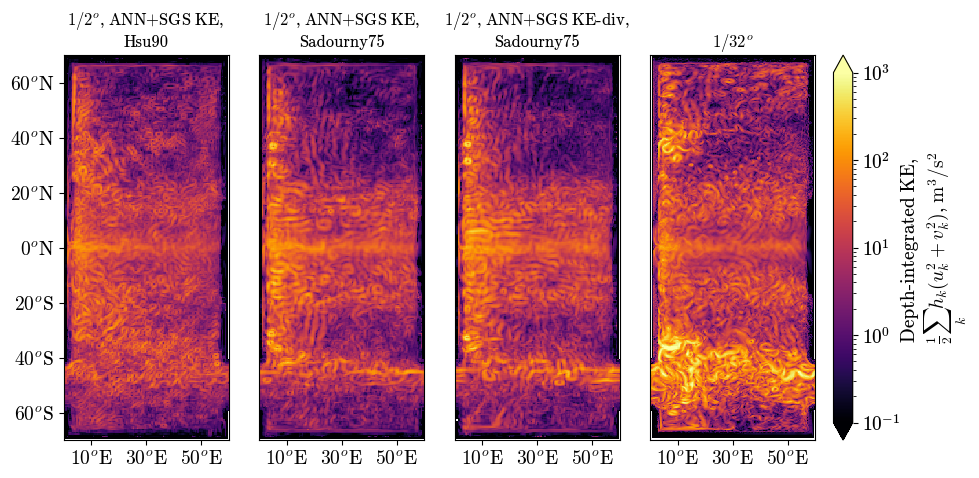

In [38]:
plot(99)

In [39]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(plot, range(0,100), FPS=15, filename='NW2_ANN_R2_scheme_div.mp4', dpi=150)

Native resolution of snapshots is used: 1460x710

Animation NW2_ANN_R2_scheme_div.mp4 at FPS=15 will last for 6.7 seconds. The frames are saved to 
.ffmpeg/NW2_ANN_R2_scheme_div



ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CPU times: user 2min 10s, sys: 58.5 s, total: 3min 8s
Wall time: 2min 14s


frame=  100 fps= 23 q=-1.0 Lsize=   10569kB time=00:00:06.46 bitrate=13388.4kbits/s speed=1.47x    
video:10567kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.019463%
[libx264 @ 0x560c74537840] frame I:1     Avg QP:19.85  size:102187
[libx264 @ 0x560c74537840] frame P:25    Avg QP:22.86  size:117055
[libx264 @ 0x560c74537840] frame B:74    Avg QP:24.29  size:105285
[libx264 @ 0x560c74537840] consecutive B-frames:  1.0%  0.0%  3.0% 96.0%
[libx264 @ 0x560c74537840] mb I  I16..4: 22.6% 51.3% 26.1%
[libx264 @ 0x560c74537840] mb P  I16..4:  3.3% 24.3% 14.4%  P16..4:  3.0%  5.2%  6.4%  0.0%  0.0%    skip:43.4%
[libx264 @ 0x560c74537840] mb B  I16..4:  1.7% 15.7% 10.6%  B16..8:  6.6%  9.7%  8.1%  direct: 3.7%  skip:43.9%  L0:35.7% L1:25.4% BI:38.9%
[libx264 @ 0x560c74537840] 8x8 transform intra:56.5% inter:53.3%
[libx264 @ 0x560c74537840] coded y,uvDC,uvAC intra: 95.8% 96.5% 96.4% inter: 30.0% 30.9% 28.9%
[libx264 @ 0x560c74537840] i16 v,h,dc,p: 19% 14% 47% 2

In [20]:
KE(R4_ann_hsu90).hvplot(x='xh', y='yh', width=450, height=600, cmap='inferno')

:DynamicMap   [time,zl]
   :Image   [xh,yh]   (value)

In [17]:
KE(R32).hvplot(x='xh', y='yh', width=450, height=600, cmap='inferno')

:DynamicMap   [time,zl]
   :Image   [xh,yh]   (value)

# Numerical scheme in Double Gyre

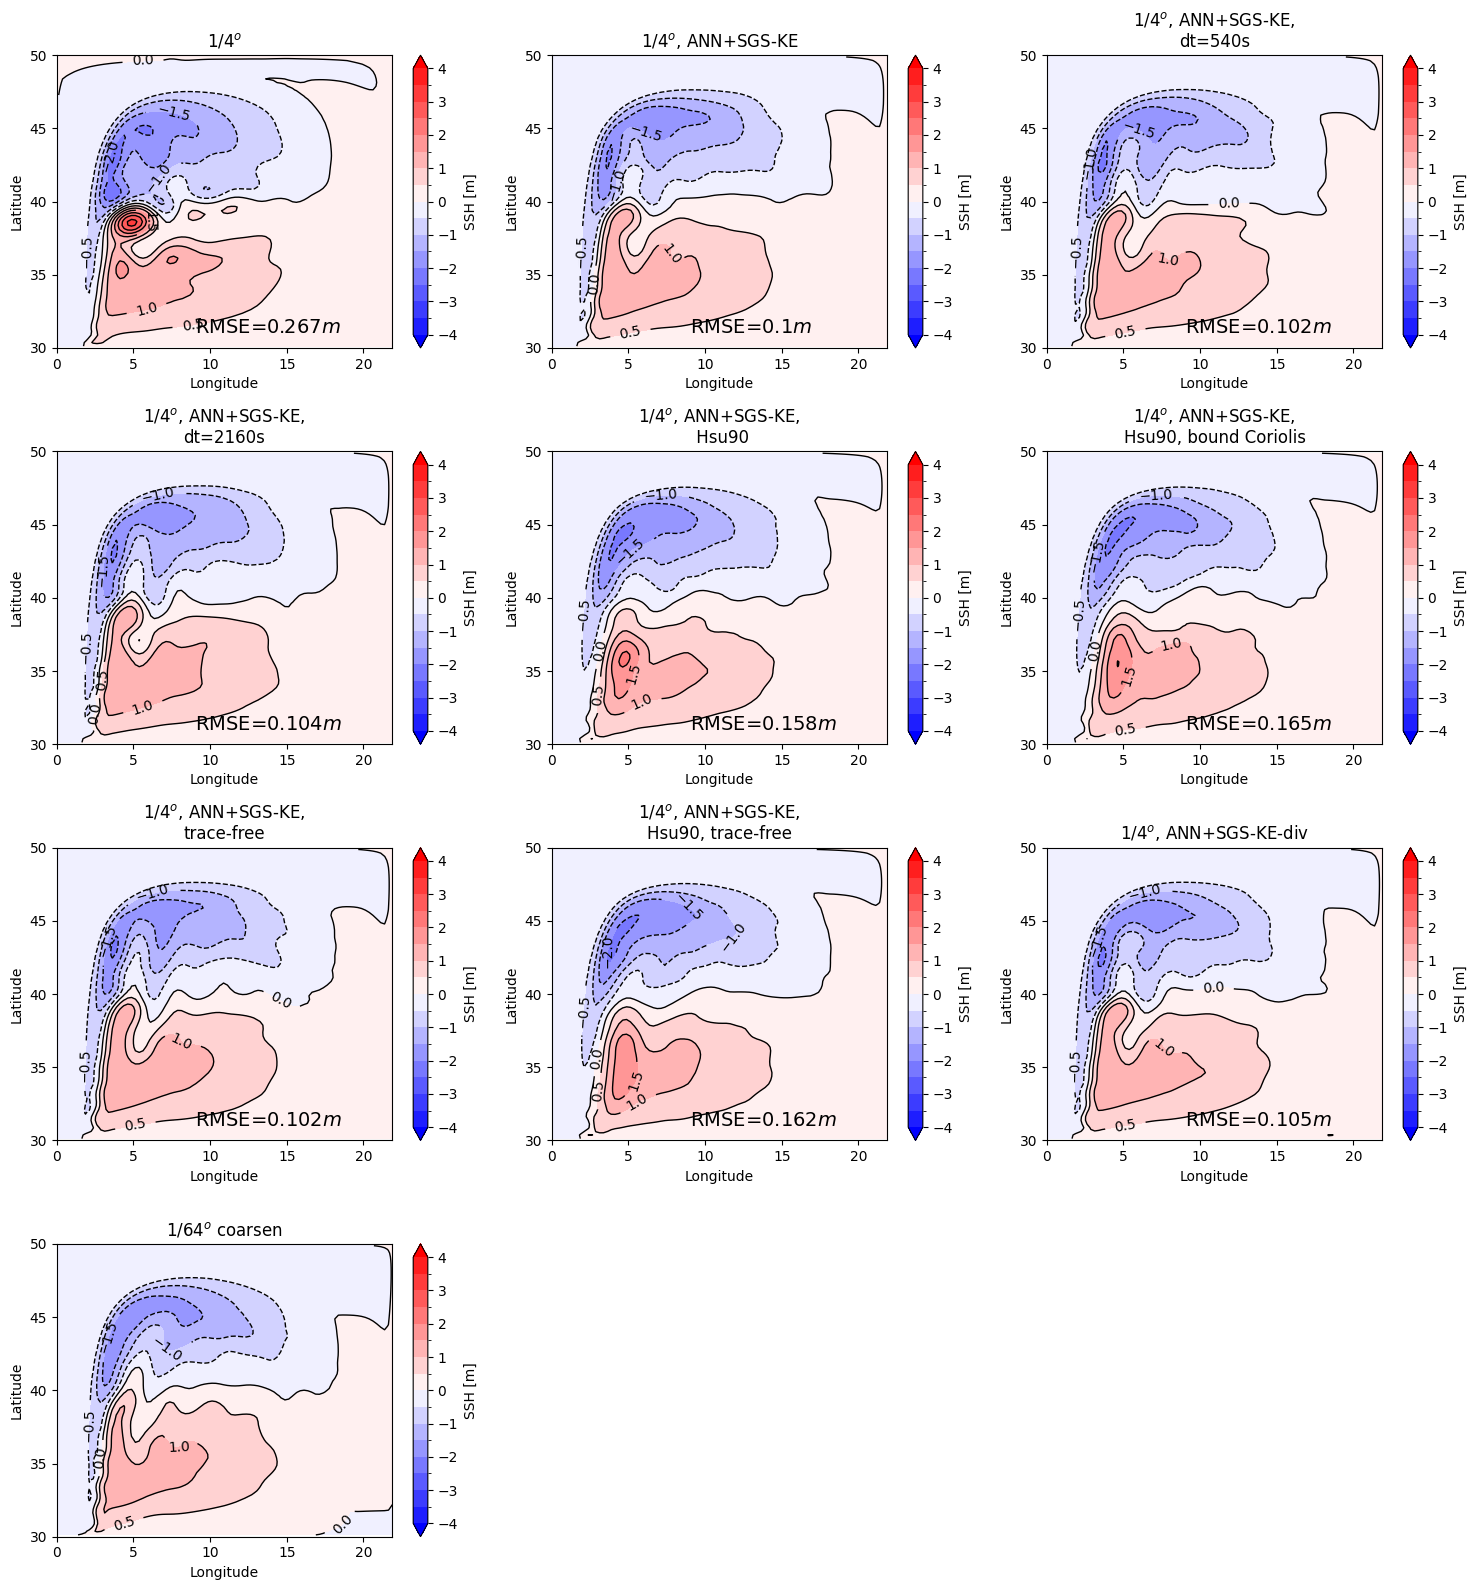

In [10]:
RR='R4'
ds.plot_ssh([f'{RR}',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-540.0',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-2160.0',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-HSU',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-bound-Coriolis',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-trace-free',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-HSU-trace-free',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div',
             f'R64_{RR}'],
            ['$1/4^o$', '$1/4^o$, ANN+SGS-KE', '$1/4^o$, ANN+SGS-KE,\ndt=540s', 
             '$1/4^o$, ANN+SGS-KE,\ndt=2160s', '$1/4^o$, ANN+SGS-KE,\n Hsu90', 
             '$1/4^o$, ANN+SGS-KE, \nHsu90, bound Coriolis',
             '$1/4^o$, ANN+SGS-KE, \ntrace-free',
             '$1/4^o$, ANN+SGS-KE, \nHsu90, trace-free',
             '$1/4^o$, ANN+SGS-KE-div',
             '$1/64^o$ coarsen'])

In [ ]:
RR='R4'
ds.plot_ssh([f'{RR}',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated-diss',
             f'R64_{RR}'])

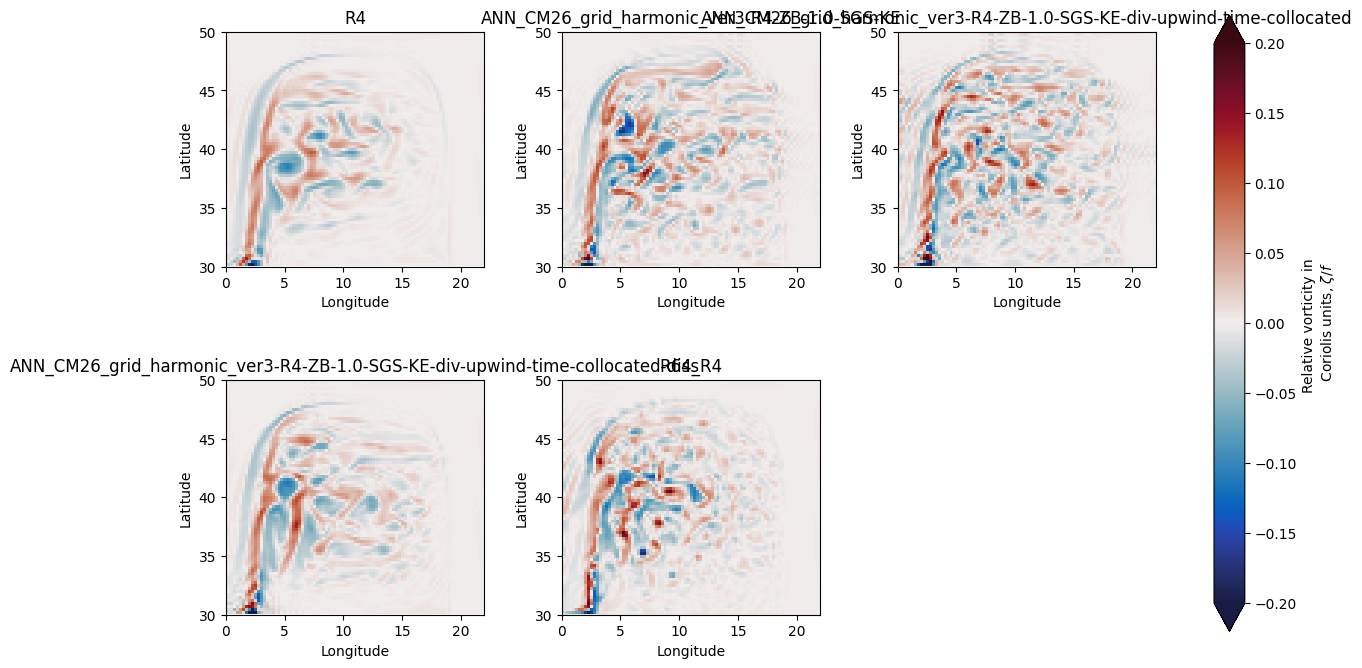

In [15]:
RR='R4'
ds.plot_RV([f'{RR}',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated-diss',
             f'R64_{RR}'])

In [16]:
RR='R4'
ds.plot_KE_spectrum([f'{RR}',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-div-upwind-time-collocated-diss',
             f'R64_{RR}'])

Exception ignored in: <function CachingFileManager.__del__ at 0x14a005337920>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/site-packages/xarray/backends/file_manager.py", line 236, in __del__
    def __del__(self) -> None:

KeyboardInterrupt: 

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x14a003fb4d60> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x149fe578ab60> (for post_execute):



KeyboardInterrupt



In [78]:
def plot(idx):
    RR='R4'
    ds.plot_RV([f'{RR}',
                 f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
                 f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-540.0',
                 f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-2160.0',
                 f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-HSU',
                 f'R64_{RR}'],
                ['$1/4^o$', '$1/4^o$, ANN+SGS-KE', '$1/4^o$, ANN+SGS-KE,\ndt=540s', '$1/4^o$, ANN+SGS-KE,\ndt=2160s', '$1/4^o$, ANN+SGS-KE,\n Hsu90', '$1/64^o$ coarsen'],
                 idx=idx)

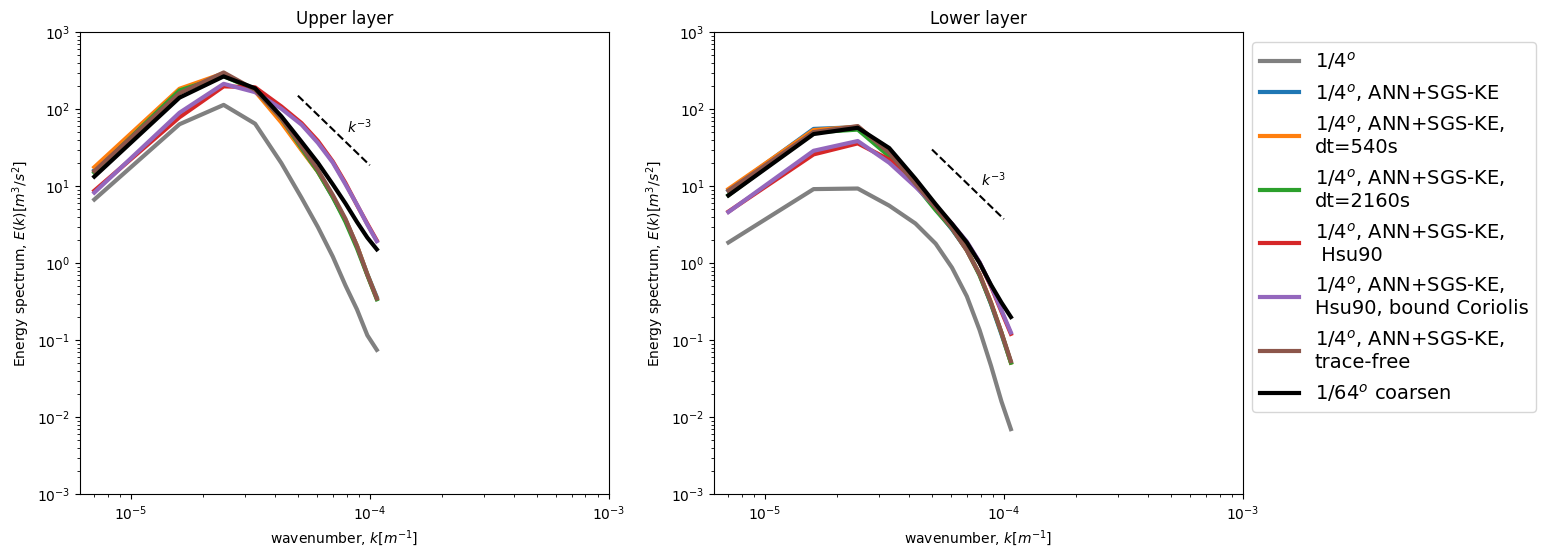

In [10]:
RR='R4'
ds.plot_KE_spectrum([f'{RR}',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-540.0',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-2160.0',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-HSU',
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-bound-Coriolis', 
             f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-trace-free',
             f'R64_{RR}'],
            labels=['$1/4^o$', '$1/4^o$, ANN+SGS-KE', '$1/4^o$, ANN+SGS-KE,\ndt=540s', 
             '$1/4^o$, ANN+SGS-KE,\ndt=2160s', '$1/4^o$, ANN+SGS-KE,\n Hsu90', 
             '$1/4^o$, ANN+SGS-KE, \nHsu90, bound Coriolis',
             '$1/4^o$, ANN+SGS-KE, \ntrace-free',
             '$1/64^o$ coarsen']);

Text(0.5, 1.0, '')

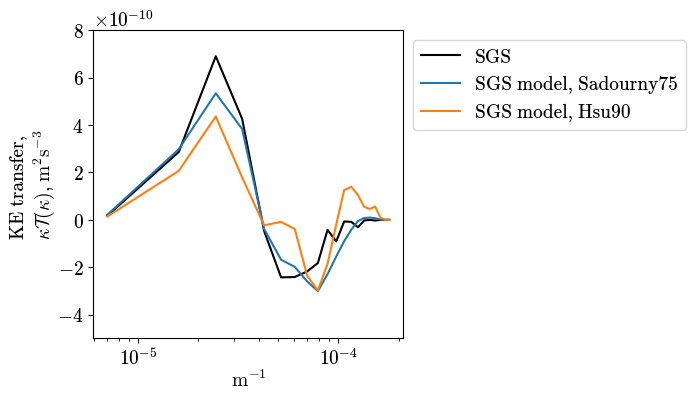

In [166]:
zl = 0
plot = lambda x, **kw: (x * x.freq_r).isel(zl=zl).plot(xscale='log', **kw)

plot(ds['R64_R4'].SGS_transfer, color='k', label='SGS')
plot(ds[f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE'].ZB_transfer, label='SGS model, Sadourny75')
plot(ds[f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-SGS-KE-HSU'].ZB_transfer, label='SGS model, Hsu90')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('$\mathrm{m}^{-1}$')
plt.ylim([-0.5e-9, 0.8e-9])
plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$, $\mathrm{m}^2\mathrm{s}^{-3}$')
plt.title('')

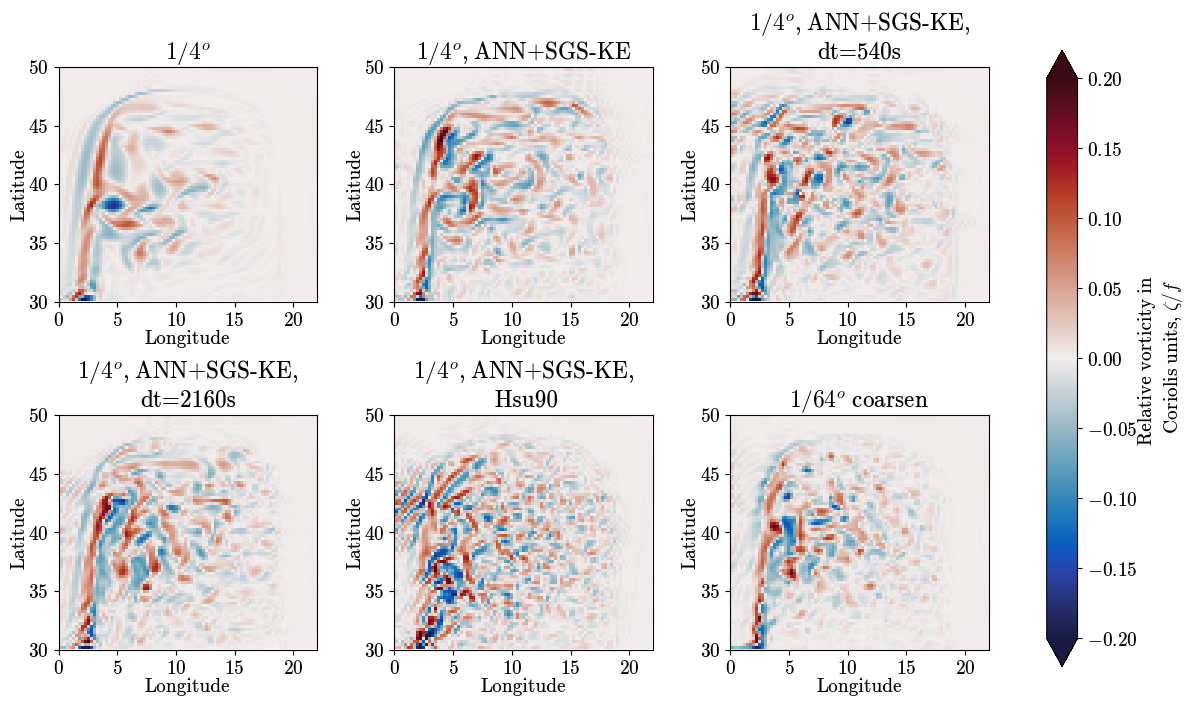

In [83]:
plot(100)

In [91]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(plot, range(0,150), FPS=18, filename='DG_ANN_R4_scheme.mp4', dpi=120)

Native resolution of snapshots is used: 1430x848

Animation DG_ANN_R4_scheme.mp4 at FPS=18 will last for 8.3 seconds. The frames are saved to 
.ffmpeg/DG_ANN_R4_scheme



ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CPU times: user 3min 44s, sys: 1min 31s, total: 5min 16s
Wall time: 4min 59s


frame=  150 fps= 39 q=-1.0 Lsize=    6619kB time=00:00:08.16 bitrate=6639.6kbits/s speed=2.14x    
video:6616kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.040117%
[libx264 @ 0x5587e187b380] frame I:1     Avg QP:15.73  size: 58313
[libx264 @ 0x5587e187b380] frame P:38    Avg QP:19.76  size: 51382
[libx264 @ 0x5587e187b380] frame B:111   Avg QP:21.02  size: 42917
[libx264 @ 0x5587e187b380] consecutive B-frames:  1.3%  0.0%  0.0% 98.7%
[libx264 @ 0x5587e187b380] mb I  I16..4: 27.1% 53.1% 19.7%
[libx264 @ 0x5587e187b380] mb P  I16..4:  0.9% 11.9%  7.7%  P16..4:  7.4%  6.2%  3.8%  0.0%  0.0%    skip:62.1%
[libx264 @ 0x5587e187b380] mb B  I16..4:  0.3%  4.9%  5.6%  B16..8: 10.1%  7.7%  4.1%  direct: 3.0%  skip:64.3%  L0:45.3% L1:35.0% BI:19.6%
[libx264 @ 0x5587e187b380] 8x8 transform intra:50.3% inter:61.8%
[libx264 @ 0x5587e187b380] coded y,uvDC,uvAC intra: 87.0% 85.5% 81.1% inter: 17.8% 13.1% 6.9%
[libx264 @ 0x5587e187b380] i16 v,h,dc,p: 60% 32%  4%  3%


# Discretization sensitivity for ZB20-Smooth

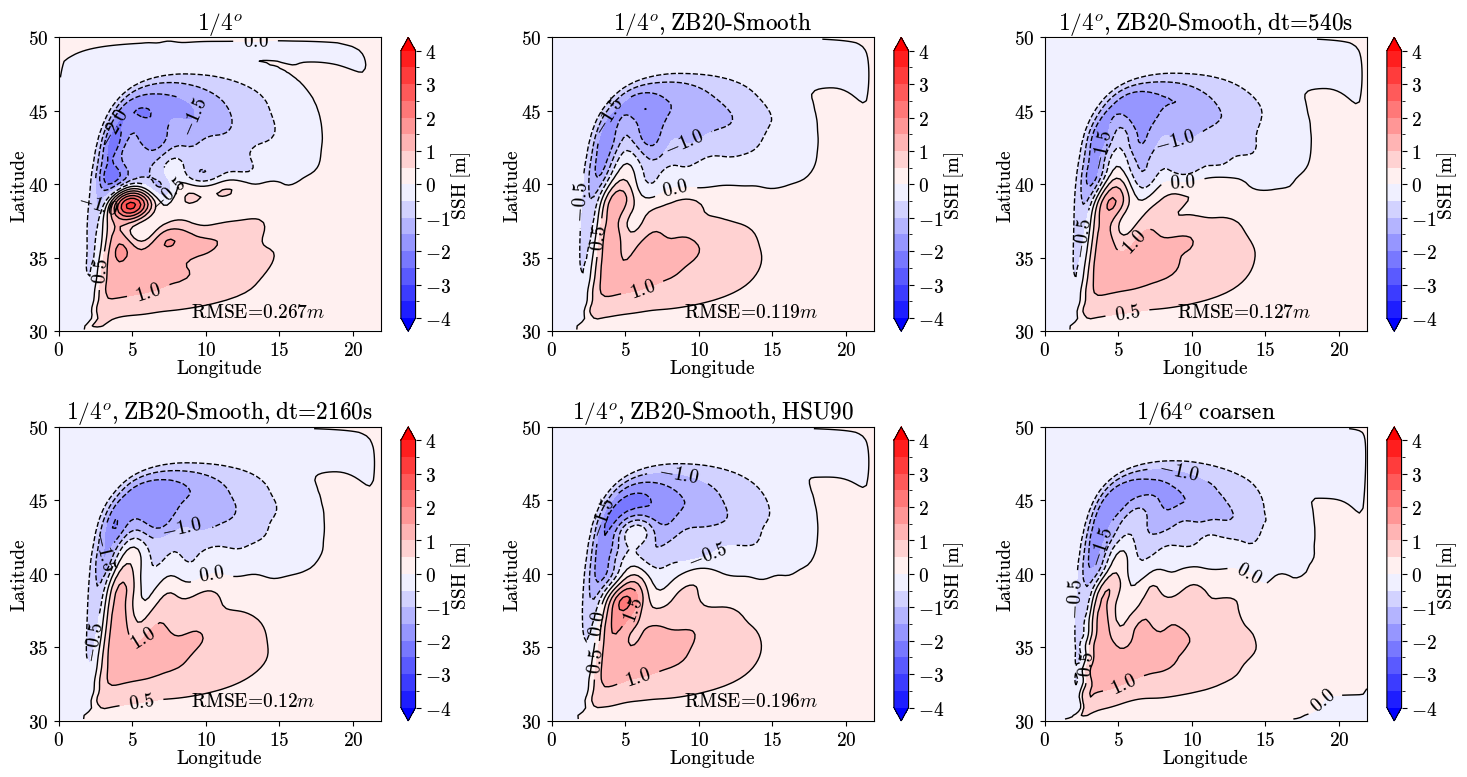

In [105]:
RR='R4'
ds.plot_ssh([f'{RR}',
             f'ZB-Smooth-{RR}-ZB-1.0',
             f'ZB-Smooth-{RR}-ZB-1.0-540.0',
             f'ZB-Smooth-{RR}-ZB-1.0-2160.0',
             f'ZB-Smooth-{RR}-ZB-1.0-HSU',
             f'R64_{RR}'],
            ['$1/4^o$', 
             '$1/4^o$, ZB20-Smooth',
             '$1/4^o$, ZB20-Smooth, dt=540s',
             '$1/4^o$, ZB20-Smooth, dt=2160s',
             '$1/4^o$, ZB20-Smooth, HSU90',
             '$1/64^o$ coarsen'])

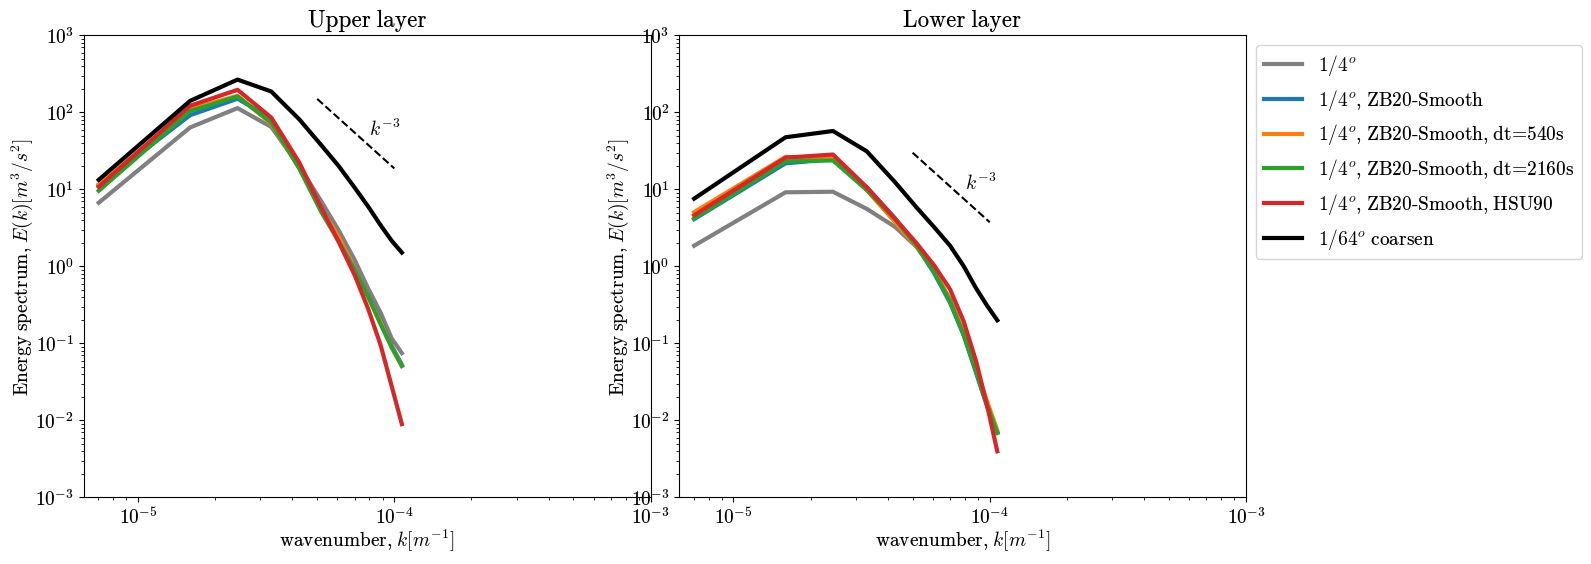

In [107]:
RR='R4'
ds.plot_KE_spectrum([f'{RR}',
             f'ZB-Smooth-{RR}-ZB-1.0',
             f'ZB-Smooth-{RR}-ZB-1.0-540.0',
             f'ZB-Smooth-{RR}-ZB-1.0-2160.0',
             f'ZB-Smooth-{RR}-ZB-1.0-HSU',
             f'R64_{RR}'],
            labels=['$1/4^o$', 
             '$1/4^o$, ZB20-Smooth',
             '$1/4^o$, ZB20-Smooth, dt=540s',
             '$1/4^o$, ZB20-Smooth, dt=2160s',
             '$1/4^o$, ZB20-Smooth, HSU90',
             '$1/64^o$ coarsen']);

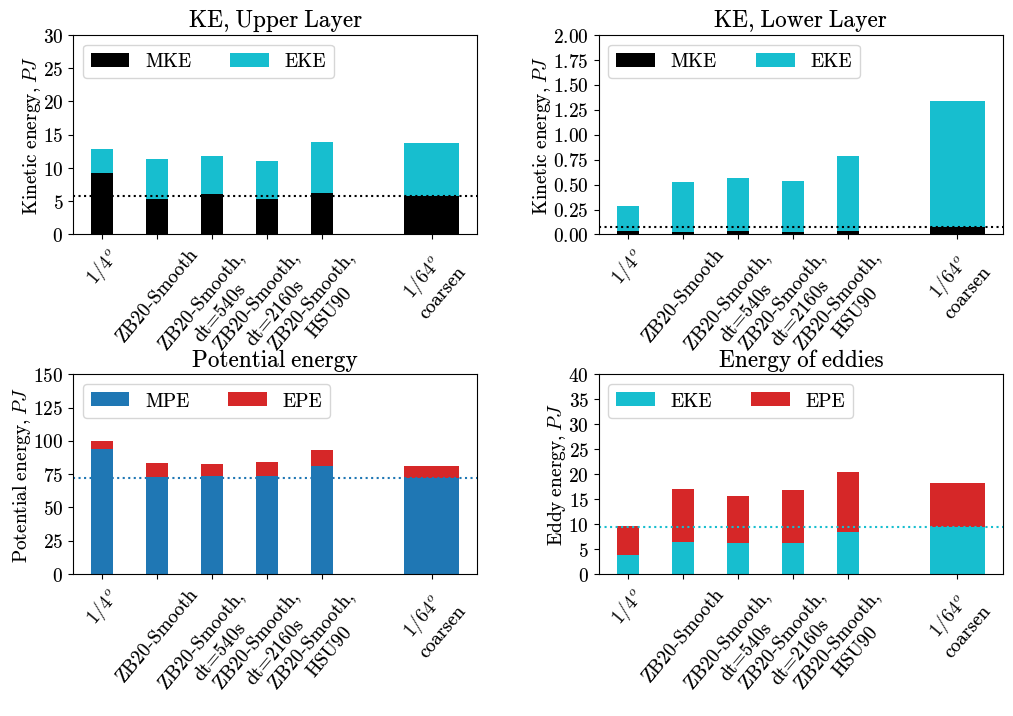

In [131]:
RR='R4'
ds.plot_KE_PE([f'{RR}',
             f'ZB-Smooth-{RR}-ZB-1.0',
             f'ZB-Smooth-{RR}-ZB-1.0-540.0',
             f'ZB-Smooth-{RR}-ZB-1.0-2160.0',
             f'ZB-Smooth-{RR}-ZB-1.0-HSU',
             f'R64_{RR}'],
            labels=['$1/4^o$', 
             'ZB20-Smooth',
             'ZB20-Smooth, \ndt=540s',
             'ZB20-Smooth, \ndt=2160s',
             'ZB20-Smooth, \nHSU90',
             '$1/64^o$ \ncoarsen'], rotation=50);

Text(0.5, 1.0, '')

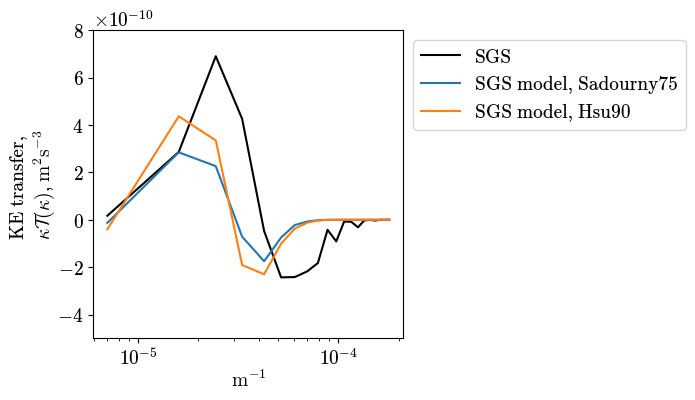

In [167]:
zl = 0
plot = lambda x, **kw: (x * x.freq_r).isel(zl=zl).plot(xscale='log', **kw)

plot(ds['R64_R4'].SGS_transfer, color='k', label='SGS')
plot(ds[f'ZB-Smooth-{RR}-ZB-1.0'].ZB_transfer, label='SGS model, Sadourny75')
plot(ds[f'ZB-Smooth-{RR}-ZB-1.0-HSU'].ZB_transfer, label='SGS model, Hsu90')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('$\mathrm{m}^{-1}$')
plt.ylim([-0.5e-9, 0.8e-9])
plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$, $\mathrm{m}^2\mathrm{s}^{-3}$')
plt.title('')

In [110]:
def plot(idx=0):
    RR='R4'
    ds.plot_RV([f'{RR}',
                 f'ZB-Smooth-{RR}-ZB-1.0',
                 f'ZB-Smooth-{RR}-ZB-1.0-540.0',
                 f'ZB-Smooth-{RR}-ZB-1.0-2160.0',
                 f'ZB-Smooth-{RR}-ZB-1.0-HSU',
                 f'R64_{RR}'],
                labels=['$1/4^o$', 
                 '$1/4^o$, ZB20-Smooth',
                 '$1/4^o$, ZB20-Smooth, dt=540s',
                 '$1/4^o$, ZB20-Smooth, dt=2160s',
                 '$1/4^o$, ZB20-Smooth, HSU90',
                 '$1/64^o$ coarsen'], idx=idx)

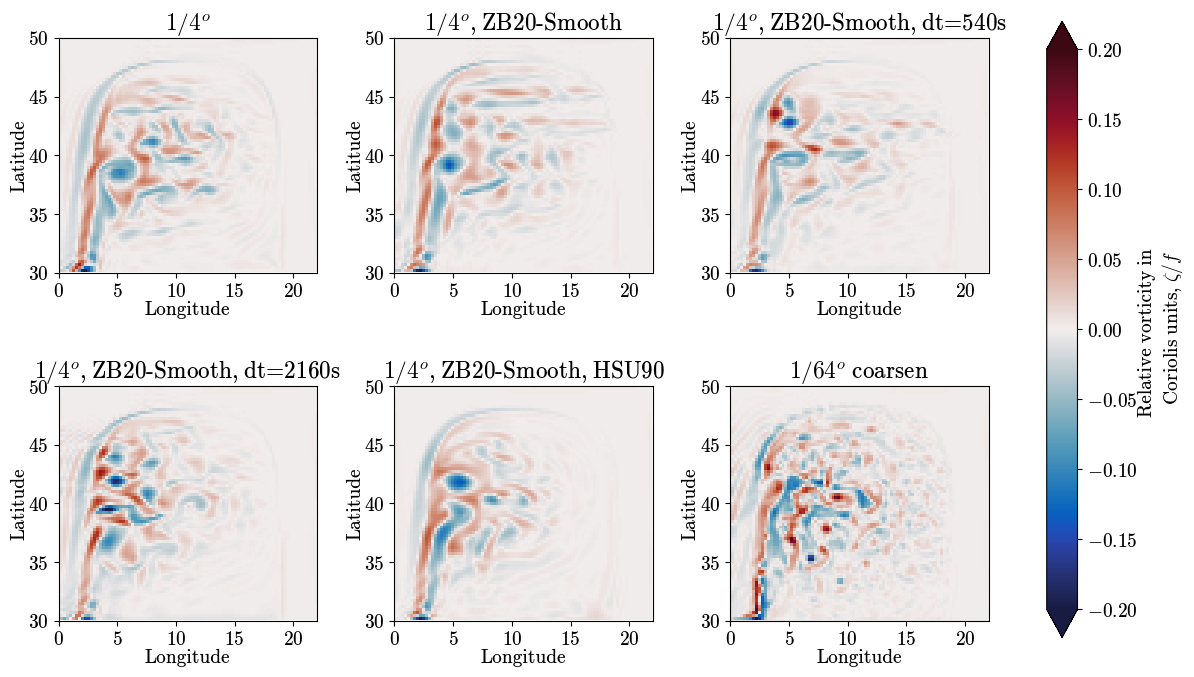

In [115]:
plot(-1)

In [116]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(plot, range(0,150), FPS=18, filename='DG_ZB_Zmooth_R4_scheme.mp4', dpi=120)

Native resolution of snapshots is used: 1430x814

Animation DG_ZB_Zmooth_R4_scheme.mp4 at FPS=18 will last for 8.3 seconds. The frames are saved to 
.ffmpeg/DG_ZB_Zmooth_R4_scheme



ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CPU times: user 3min 45s, sys: 1min 32s, total: 5min 18s
Wall time: 4min 12s


frame=  150 fps= 47 q=-1.0 Lsize=    3529kB time=00:00:08.16 bitrate=3540.4kbits/s speed=2.56x    
video:3527kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.074928%
[libx264 @ 0x561cb4a36980] frame I:1     Avg QP:15.97  size: 57879
[libx264 @ 0x561cb4a36980] frame P:38    Avg QP:20.00  size: 29823
[libx264 @ 0x561cb4a36980] frame B:111   Avg QP:21.79  size: 21798
[libx264 @ 0x561cb4a36980] consecutive B-frames:  1.3%  0.0%  0.0% 98.7%
[libx264 @ 0x561cb4a36980] mb I  I16..4: 25.3% 54.1% 20.6%
[libx264 @ 0x561cb4a36980] mb P  I16..4:  1.3% 11.1%  4.1%  P16..4: 10.2%  7.1%  3.6%  0.0%  0.0%    skip:62.6%
[libx264 @ 0x561cb4a36980] mb B  I16..4:  0.6%  4.0%  1.9%  B16..8: 12.4%  8.1%  3.2%  direct: 3.5%  skip:66.3%  L0:46.5% L1:37.9% BI:15.6%
[libx264 @ 0x561cb4a36980] 8x8 transform intra:63.7% inter:66.5%
[libx264 @ 0x561cb4a36980] coded y,uvDC,uvAC intra: 73.7% 71.2% 59.0% inter: 16.8% 11.5% 3.3%
[libx264 @ 0x561cb4a36980] i16 v,h,dc,p: 61% 33%  3%  3%


# Brand new metrics

In [51]:
M4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/longmean_00029050.nc', decode_times=False).mean('time')
M4_smooth = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/Smooth-filter-3D/output/longmean_00029050.nc', decode_times=False).mean('time')
M4_reynolds = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/Reynolds-newest-code/output/longmean_00029050.nc', decode_times=False).mean('time')
M4_clean = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/ZB-clean-0.5/output/longmean_00029050.nc', decode_times=False).mean('time')
M4_JH = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/JansenHeld-Cs-0.2-Cback-0.1/output/longmean_00029050.nc', decode_times=False).mean('time')
M32 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R32/longmean*.nc', decode_times=False)
M1_ANN = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/CM26_grid_harmonic_ver3-SGS-KE-Sadourny-div/output/longmean_00029050.nc', decode_times=False).mean('time')

In [65]:
selector = lambda x: x.isel(xh=0)
#selector = lambda x: x.interp(xh=45)

e32 = selector(M32.e).mean('time').compute()
e4 = selector(M4.e).compute()
e4_smooth = selector(M4_smooth.e).compute()
e4_reynolds = selector(M4_reynolds.e).compute()
e4_clean = selector(M4_clean.e).compute()
e4_JH = selector(M4_JH.e).compute()
e1_ANN = selector(M1_ANN.e).interp(yh=e4.yh).compute()

e32 = e32.interp(yh=e4.yh)

In [62]:
def plot_interfaces(e, target=e32, xtext=-44, ytext=-3900):
    for zi in range(15):
        e.isel(zi=zi).plot(ls='--', color='blue', lw=2)
        target.isel(zi=zi).plot(ls='-', color='k', lw=2, alpha=0.5)
    e.isel(zi=-1).plot(color='k') # show bathymetry 
    
    error = (e - target).isel(zi=slice(0,15))
    RMSE = np.sqrt((error**2).mean()) # RMSE in metres
    plt.text(xtext,ytext,'RMSE=\n'+"{:.1f}".format(RMSE)+'$\,\mathrm{m}$', fontsize=15)
    plt.xlabel('Latitude, $^{\circ}\mathrm{S}$')
    plt.yticks(np.arange(-4000,1000,1000), np.arange(4000,-1000,-1000))
    plt.ylabel('Depth, $\mathrm{m}$')
    plt.title('')

def plot_interfaces_Drake(e, target=e32):
    plot_interfaces(e,target)
    
    lats = [-60, -50, -40]
    plt.xticks(lats, [f'${-j}$' for j in lats], rotation=0)
    plt.xlim([-61,-39])
    
    # Layer number
    xoff = {2:-42,5:-45,7:-48,9:-50,11:-51,13:-52}
    for k,x in xoff.items():
        plt.text(x, e32.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center', fontsize=13)


Text(0.5, 0.98, 'Transect Lon=45')

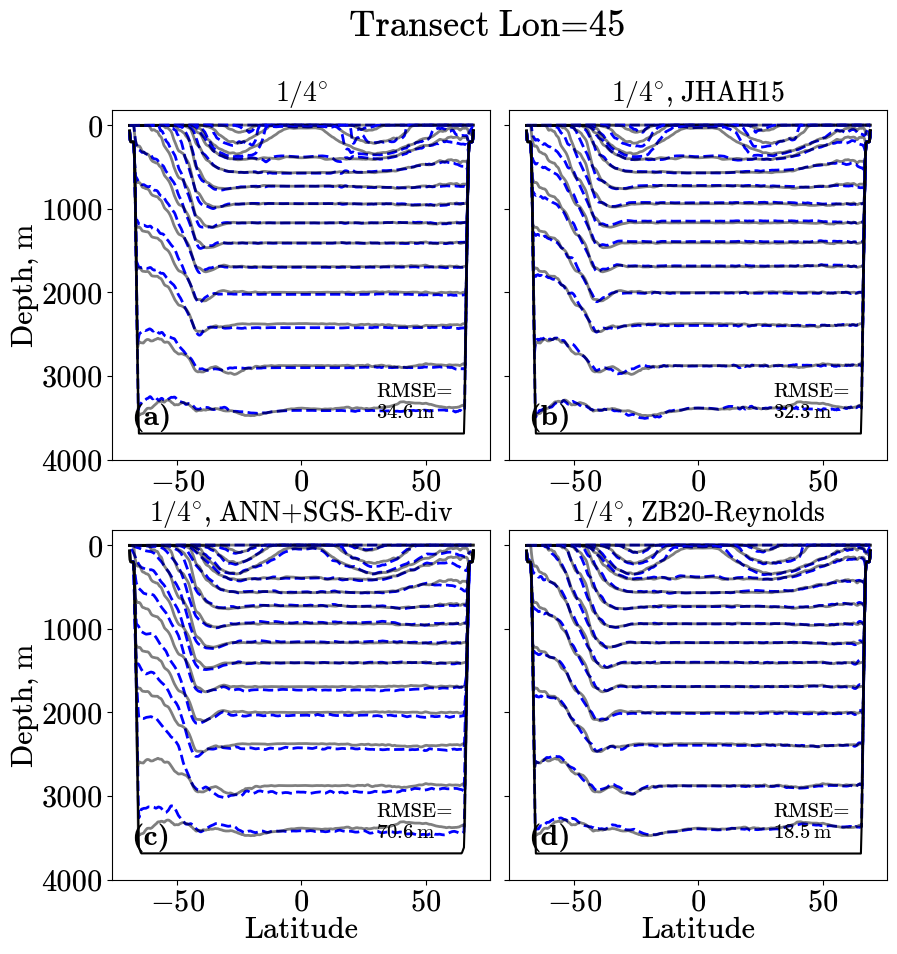

In [64]:
default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.2, 'font.size': 22})
plt.figure(figsize=(10,10))
for col, (e, label) in enumerate(
    zip(
        [e4, e4_JH, e1_ANN, e4_reynolds], 
        ['$1/4^{\circ}$', '$1/4^{\circ}$, JHAH15',
         '$1^{\circ}$, ANN+SGS-KE-div', '$1/4^{\circ}$, ZB20-Reynolds']
        )
    ):
    plt.subplot(2,2,col+1)
    plot_interfaces(e, target=e32, xtext=30, ytext=-3500)
    plt.title(label, fontsize=20)
    plt.xlabel('Latitude')
    if col==1 or col==3:
        plt.ylabel('')
        plt.yticks(np.arange(-4000,1000,1000), ['']*5)
    if col==0 or col==1:
        plt.xlabel('')
#        plt.xticks([-60, -50, -40], [None]*3)
# plt.plot(np.nan,np.nan,color='k', ls='-', lw=1, label='$1/32^o$')
# plt.legend(loc='lower right', fontsize=10)

        
set_letters(fontsize=20, x=0.05,y=0.1)
plt.suptitle('Transect Lon=45')
#plt.savefig('Review/NW2-Transect-30.pdf')

Text(0.5, 0.98, 'Transect Lon=30')

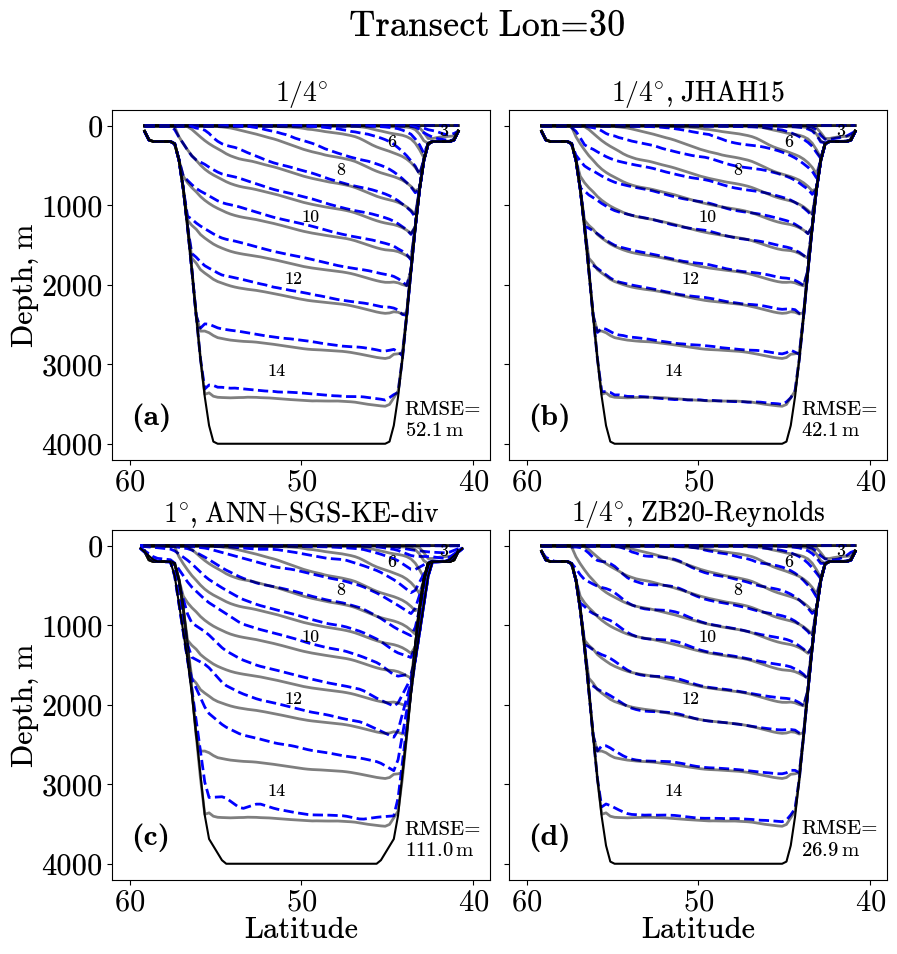

In [68]:
default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.2, 'font.size': 22})
plt.figure(figsize=(10,10))
for col, (e, label) in enumerate(
    zip(
        [e4, e4_JH, e1_ANN, e4_reynolds], 
        ['$1/4^{\circ}$', '$1/4^{\circ}$, JHAH15',
         '$1^{\circ}$, ANN+SGS-KE-div', '$1/4^{\circ}$, ZB20-Reynolds']
        )
    ):
    plt.subplot(2,2,col+1)
    plot_interfaces_Drake(e, target=e32)
    plt.title(label, fontsize=20)
    plt.xlabel('Latitude')
    if col==1 or col==3:
        plt.ylabel('')
        plt.yticks(np.arange(-4000,1000,1000), ['']*5)
    if col==0 or col==1:
        plt.xlabel('')
#        plt.xticks([-60, -50, -40], [None]*3)
# plt.plot(np.nan,np.nan,color='k', ls='-', lw=1, label='$1/32^o$')
# plt.legend(loc='lower right', fontsize=10)

        
set_letters(fontsize=20, x=0.05,y=0.1)
plt.suptitle('Transect Lon=30')
#plt.savefig('Review/NW2-Transect-30.pdf')